# Loopless FBA

To simulate FBA, loopless was also used, as it might be the better solution, compared to dFBA, as psilocybin is spontaneously dephosphorylated and phosphorylated again using the psiK enzyme, which is a looped reaction. 

#### Importing the model with the YEPD medium and libraries used for visualization.

In [1]:
%run Medium_significance.ipynb

from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

'' is not a valid SBML 'SId'.


Maximum theoretical biomass productivity: 0.9398547241492603 mmol/(gdw*h)
Maximum theoretical productivity of psilocybin_synthase reaction: 3.0787126793330786 mmol/(gdw*h)
Maximum theoretical biomass productivity: 15.115388091646897 mmol/(gdw*h)
Maximum theoretical productivity of psilocybin_synthase reaction: 53.867217378002216 mmol/(gdw*h
0.0
48.55438274437815
0.0
50.223344041609295
0.0
48.40140737341289
0.0
49.312375707511094
0.0
46.57947070521645
0.0
48.327214318494725
0.0
48.40140737341289
0.0
48.0977512620468


Running the medium significance notebook (above) produces an output as some statements are printet in the notebook. These statements can be ignored. 

The model in the Medium_significance notebook is applied, as the medium is changed from minimal medium to YEPD, a complex media, which is more industrially relevant. 

The model objective is set to psilocybin synthase and two variables are made to contain the nominal optimal solution and the loopless solution. The loopless solution tries to identify a thermodynamically consistent flux state, by removing the loops in the model (cobrapy - loopless).

In [2]:
model.objective = model.reactions.psiM 
nominal = model.optimize()
loopless = loopless_solution(model)

Importing pandas to make a dataframe with a dict containing the loopless and nominal fluxes.

In [3]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

Plotting the loopless and nominal values to visualize the results.

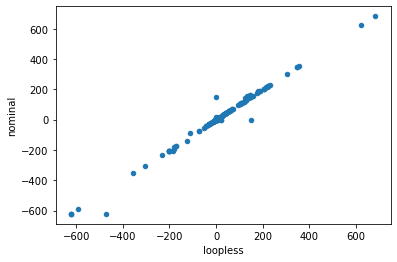

In [4]:
df.plot.scatter(x='loopless', y='nominal')

Last, but not least, finding the solution status and the loopless solution flux for psiM.

In [5]:
solution = pfba(model)
print("parsimonious solution: status = " + solution.status)
print("loopless solution flux: psiM = %.4f" % solution.fluxes["psiM"], "mmol/(gdw*h)")

parsimonious solution: status = optimal
loopless solution flux: psiM = 53.8672 mmol/(gdw*h)


1. https://cobrapy.readthedocs.io/en/latest/loopless.html.